# Insurance Data EDA

In [1]:
import os
print(os.getcwd())  # This prints the current working directory
os.chdir(r'c:\users\ermias.tadesse\10x\Claim-And-Risk-Analytics-for-Insurance')  # Set the working directory to the project root
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ermias.tadesse\10x\Claim-And-Risk-Analytics-for-Insurance\notebooks


# Create the full file path

In [2]:
file = 'MachineLearningRating_v3.txt'
print(f"Analyzing {file}")
# Create the full file path
file_path = os.path.join('data', file)

# Check if file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else :
    print(f"File found: {file_path}")

Analyzing MachineLearningRating_v3.txt
File found: data\MachineLearningRating_v3.txt


# Load the data ( adjust delimiter using ' | ' )

In [3]:
# Load the data (adjust delimiter if needed, e.g., tab or space)
data = pd.read_csv(file_path, delimiter='|')  # Update delimiter as necessary

# Explore the data
print(data.head())  # View the first few rows


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\2422415563.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')  # Update delimiter as necessary


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

# Check data types and missing values

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

# List of relevant numerical and catagorical columns

In [5]:

columns = {
    "insurance_policy": ["UnderwrittenCoverID", "PolicyID", "TransactionMonth"],
    "client_info": ["IsVATRegistered", "Citizenship", "LegalType", "Title", "Language", "Bank", "AccountType", "MaritalStatus", "Gender"],
    "client_location": ["Country", "Province", "PostalCode", "MainCrestaZone", "SubCrestaZone"],
    "car_insured": ["ItemType", "mmcode", "VehicleType", "RegistrationYear", "make", "Model", "Cylinders", "cubiccapacity", "kilowatts", "bodytype", "NumberOfDoors", "VehicleIntroDate", "CustomValueEstimate", "AlarmImmobiliser", "TrackingDevice"],
    "plan": ["SumInsured", "TermFrequency", "CalculatedPremiumPerTerm", "ExcessSelected", "CoverCategory", "CoverType", "CoverGroup", "Section", "Product", "StatutoryClass", "StatutoryRiskType"],
    "payment_claim": ["TotalPremium", "TotalClaims", "CapitalOutstanding", "NewVehicle", "WrittenOff", "Rebuilt", "Converted", "CrossBorder", "NumberOfVehiclesInFleet"]
}

relevant_numerical_columns = [
    'SumInsured', 'CalculatedPremiumPerTerm',
    'TotalPremium', 'TotalClaims', 'Cylinders', 'NumberOfDoors', 'CustomValueEstimate',
    'kilowatts', 'cubiccapacity', 'CapitalOutstanding'
]

relevant_categorical_columns = [
    "IsVATRegistered", 'TermFrequency', "LegalType", "Bank", "AccountType", "MaritalStatus", "Gender", "Country",
    "ItemType", "VehicleType", "RegistrationYear", "AlarmImmobiliser", "TrackingDevice",  'ExcessSelected',
    "Section", "Product", "StatutoryClass", "StatutoryRiskType",
    "CrossBorder", "CoverCategory", "CoverType", "CoverGroup"
]

# # Create lists for numerical and categorical columns
# numerical_columns = []
# categorical_columns = []

# # Loop through each column and categorize them
# for category, cols in columns.items():
#     for col in cols:
#         # Check the data type for each column
#         if pd.api.types.is_numeric_dtype(data[col]):  # Numeric data types
#             numerical_columns.append(col)
#         else:  # Categorical data types
#             categorical_columns.append(col)

# # Display the results
# print("Numerical Columns:")
# print(numerical_columns)

# print("\nCategorical Columns:")
# print(categorical_columns)

# Convert CapitalOutstanding to numeric
data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'], errors='coerce')

# Univariate Analysis
### Get Descriptive Analysis for Numerical Columns

         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims  \
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06   
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01   
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03   
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04   
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00   
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00   
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00   
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05   

           Cylinders  NumberOfDoors  CustomValueEstimate      kilowatts  \
count  999546.000000  999546.000000         2.204560e+05  999546.000000   
mean        4.046642       4.019250         2.255311e+05      97.207919   
std         0.294020       0.468314         5.645157e+05      19.393256   
min   

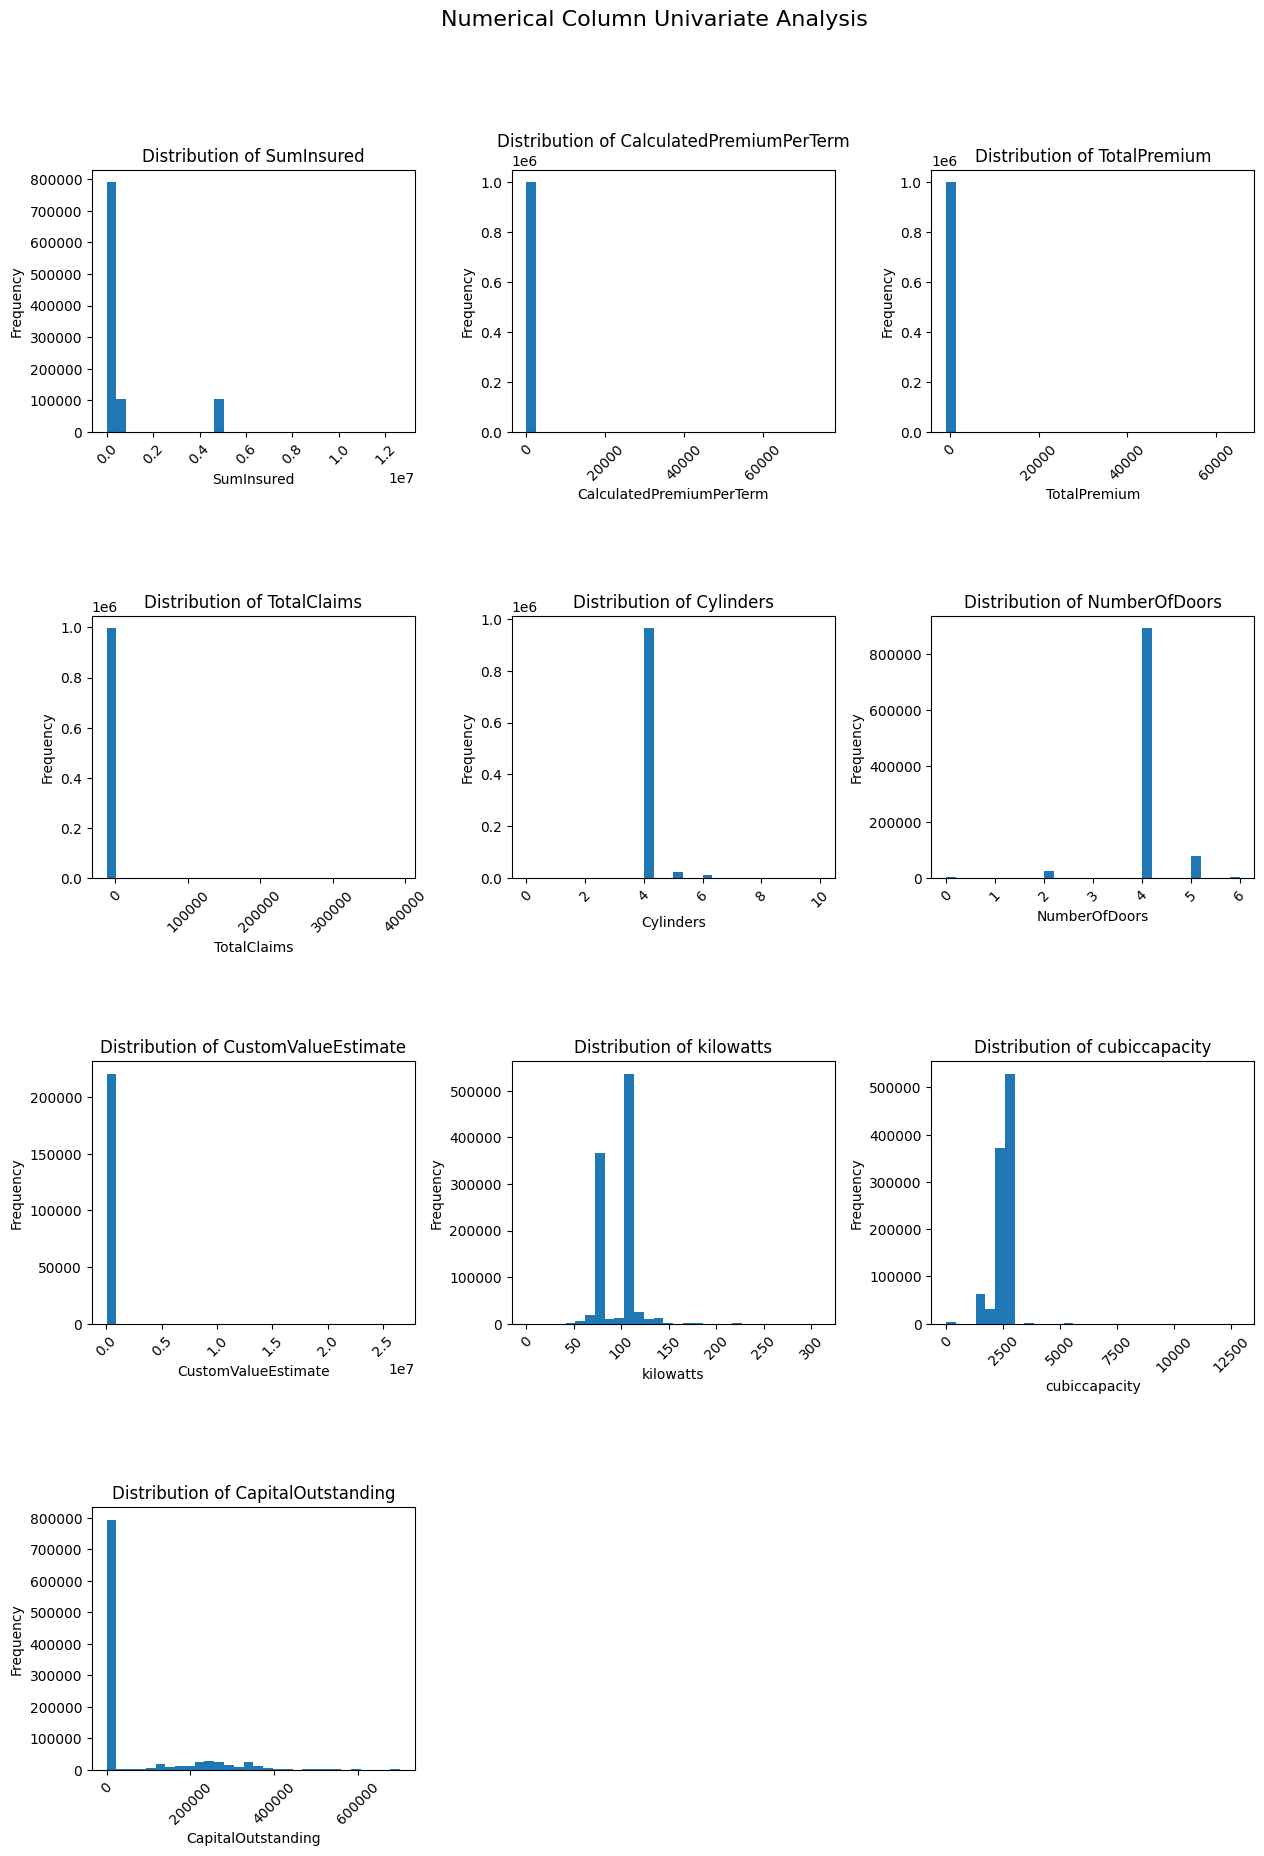

In [6]:
# Describe only the selected numerical columns
numerical_description = data[relevant_numerical_columns].describe()

# Display the description
print(numerical_description)

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(relevant_numerical_columns) + n_cols - 1) // n_cols  # Calculate needed rows

# Create a larger figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed

# Add a main title to the entire figure
fig.suptitle('Numerical Column Univariate Analysis', fontsize=16)

# Adjust space between subplots
fig.subplots_adjust(top=0.9, bottom=0.1, hspace=0.7, wspace=0.3)  # Increase hspace to add more vertical gap

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each numerical column and plot on corresponding subplot
for idx, column in enumerate(relevant_numerical_columns):
    axes[idx].hist(data[column], bins=30)
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
    
    # Rotate x-axis labels
    axes[idx].tick_params(axis='x', rotation=45)

# If there are leftover axes, remove them
for i in range(len(relevant_numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.show()

### Dexcription for Categorical Columns

In [7]:
# Create a list to store the results for each categorical column
frequency_tables = []

# Loop through each relevant categorical column
for column in relevant_categorical_columns:
    # Get the value counts (frequency distribution) for the column
    value_counts = data[column].value_counts().reset_index()
    value_counts.columns = [column, 'Frequency']
    
    # Add the results to the list
    frequency_tables.append(value_counts)

# Display each frequency table for the relevant categorical columns
for idx, table in enumerate(frequency_tables):
    print(f"Frequency table for {relevant_categorical_columns[idx]}:")
    print(table)
    print("\n" + "="*50 + "\n")  # Print separator between tables


Frequency table for IsVATRegistered:
   IsVATRegistered  Frequency
0            False     995075
1             True       5023


Frequency table for TermFrequency:
  TermFrequency  Frequency
0       Monthly     999554
1        Annual        544


Frequency table for LegalType:
           LegalType  Frequency
0         Individual     911929
1    Private company      83891
2  Close Corporation       2459
3     Public company       1295
4        Partnership        331
5    Sole proprieter        193


Frequency table for Bank:
                      Bank  Frequency
0      First National Bank     260811
1                ABSA Bank     204954
2            Standard Bank     181715
3                  Nedbank     132003
4             Capitec Bank      58155
5         RMB Private Bank      12576
6              Ithala Bank       1730
7            Investec Bank        732
8               Old Mutual        688
9           FirstRand Bank        638
10  Mercantile Lisbon Bank        135


Frequency ta

### Plot Bar Charts for Categorical Columns

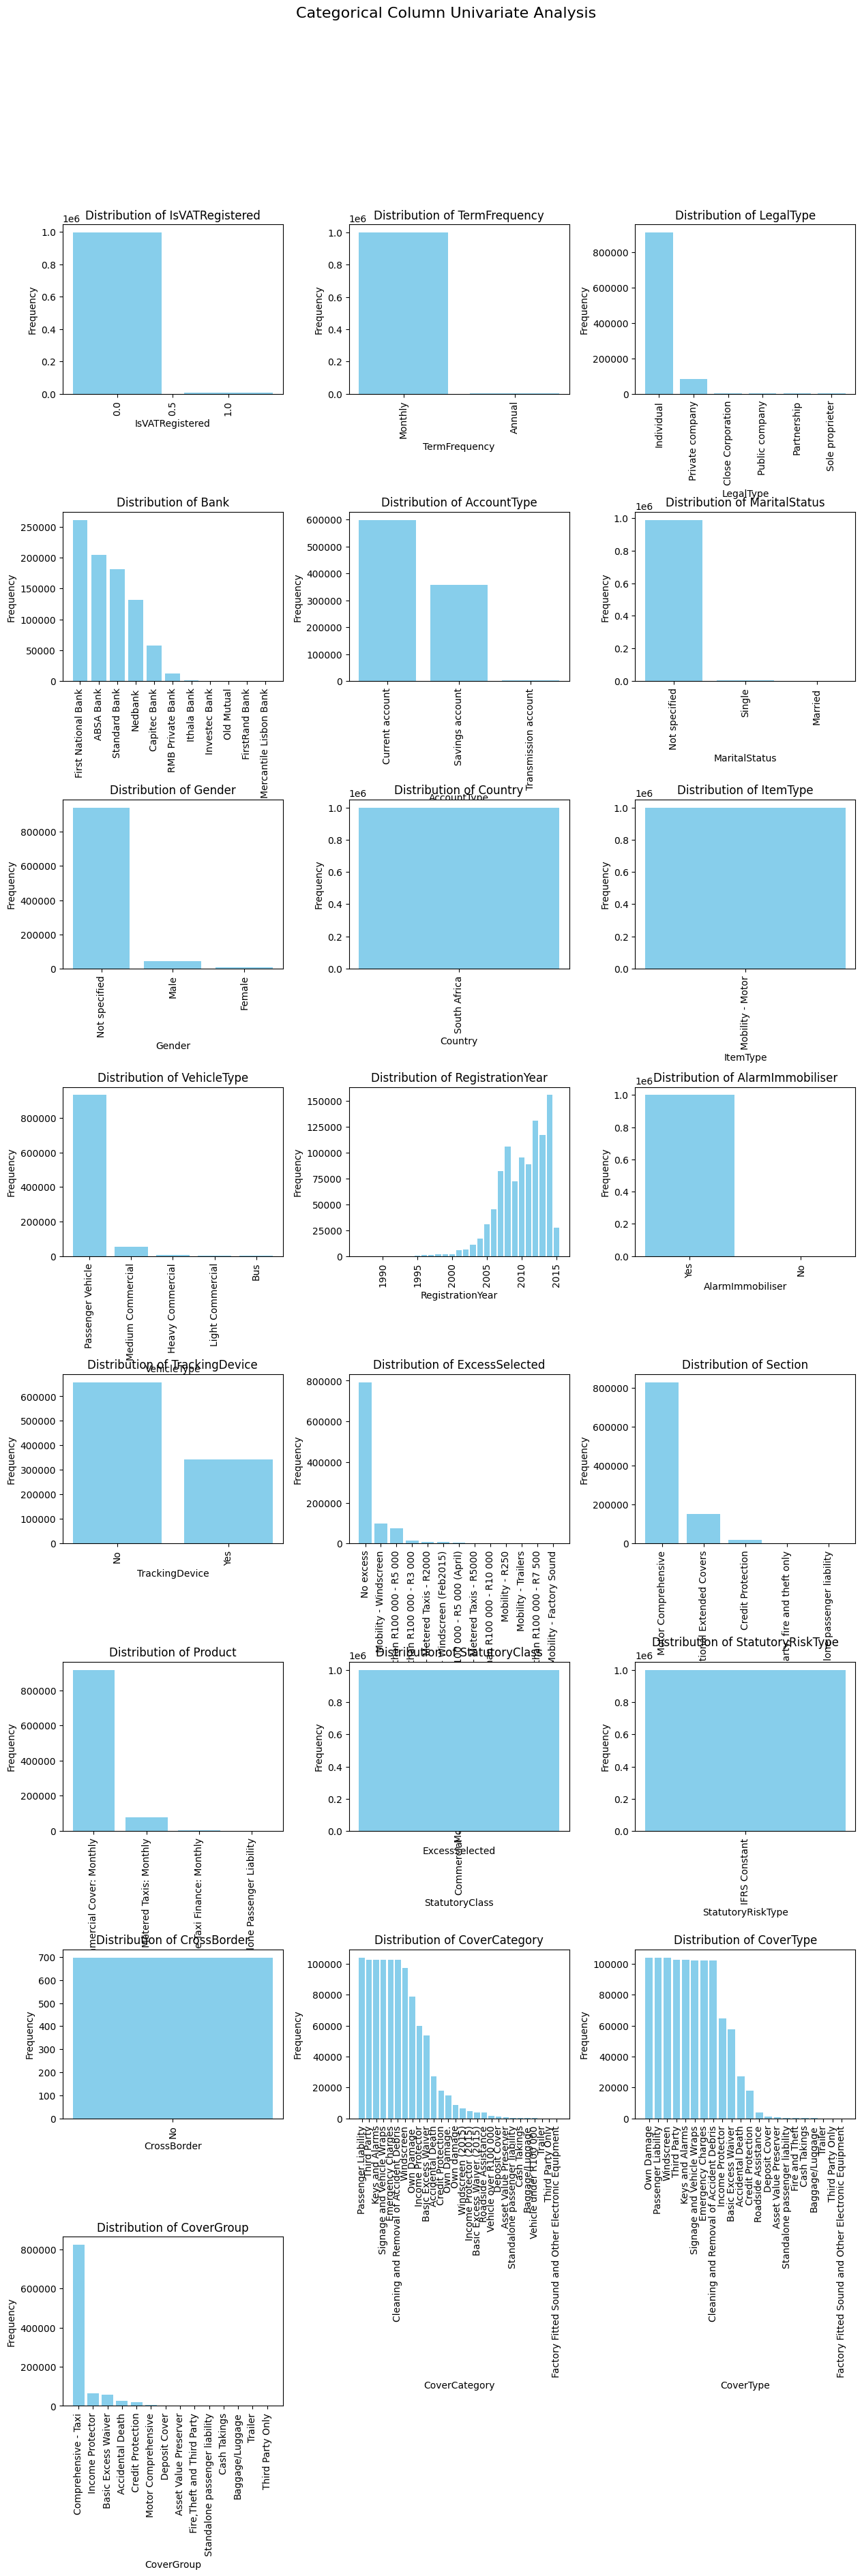

In [8]:
# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = (len(relevant_categorical_columns) + n_cols - 1) // n_cols  # Calculate needed rows

# Create a larger figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed

# Add a main title to the entire figure
fig.suptitle('Categorical Column Univariate Analysis', fontsize=16)

# Adjust space between subplots
fig.subplots_adjust(top=0.9, bottom=0.1, hspace=0.7, wspace=0.3)  # Increase hspace to add more vertical gap

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and plot on corresponding subplot
for idx, column in enumerate(relevant_categorical_columns):
    table = frequency_tables[idx]  # Get the corresponding frequency table
    axes[idx].bar(table[column], table['Frequency'], color='skyblue')
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
    
    # Rotate x-axis labels to vertical
    axes[idx].tick_params(axis='x', rotation=90)

# If there are leftover axes, remove them
for i in range(len(relevant_categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.show()

# Replace empty strings and "Not specified" with NaN for object data types and check missing values again

In [9]:
# Replace empty strings and "Not specified" with NaN for object data types
data = data.applymap(lambda x: np.nan if isinstance(x, str) and (x.strip() == '' or x == 'Not specified') else x)

# Check for missing values
missing_values = data.isnull().sum()

# Calculate percentage of missing values
missing_percentage = data.isnull().mean() * 100

# Get data types of each column
data_types = data.dtypes

# Create a DataFrame to display the results
missing_data_table = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values,
    'Data Type': data_types.values
})

# Display the table
print(missing_data_table)

C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\2790021148.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.nan if isinstance(x, str) and (x.strip() == '' or x == 'Not specified') else x)


                      Column  Missing Values  Percentage Data Type
0        UnderwrittenCoverID               0    0.000000     int64
1                   PolicyID               0    0.000000     int64
2           TransactionMonth               0    0.000000    object
3            IsVATRegistered               0    0.000000      bool
4                Citizenship          895210   89.512228    object
5                  LegalType               0    0.000000    object
6                      Title               0    0.000000    object
7                   Language               0    0.000000    object
8                       Bank          145961   14.594670    object
9                AccountType           40232    4.022806    object
10             MaritalStatus          994467   99.436955    object
11                    Gender          950526   95.043286    object
12                   Country               0    0.000000    object
13                  Province               0    0.000000    ob

## The dataset contains a mix of numerical and categorical variables across 52 columns, each representing different attributes of an insurance dataset. Here's a descriptive summary:

### 1. Unique Identifiers:
Columns like UnderwrittenCoverID, PolicyID, and TransactionMonth serve as identifiers and timestamps for individual transactions and policies.
### 2. Demographic Information:
Fields such as Citizenship, LegalType, Title, Gender, MaritalStatus, and Province capture personal details of policyholders. A significant number of missing values appear in columns like Citizenship (89.51% missing), MaritalStatus (99.44% missing), and Gender (95.04% missing).
### 3. Banking Information:
The columns Bank, AccountType, and related information are used to record the banking details of customers. Notably, Bank has around 14.6% missing data, and AccountType shows 4.02% missing values.
### 4. Vehicle Information:
This section contains detailed data about vehicles, including VehicleType, RegistrationYear, make, Model, Cylinders, cubiccapacity, and bodytype. Most of these columns have very low missing values (around 0.05%).
### 5. Insurance Policy Details:
Columns such as SumInsured, TermFrequency, CoverType, CoverCategory, and CoverGroup describe the insurance policy specifics, with no missing data in these fields.
### 6. Risk and Claims:
Information about potential risks is captured through fields like CapitalOutstanding, WrittenOff, Rebuilt, Converted, and CrossBorder. Some of these fields, such as WrittenOff, Rebuilt, and Converted, have high missing percentages (64.18%).
### 7. Premium and Claims Data:
CalculatedPremiumPerTerm, TotalPremium, and TotalClaims are financial metrics related to the insurance policies. These fields contain no missing data.
### 8. Fleet and Additional Details:
The column NumberOfVehiclesInFleet has 100% missing values, indicating that this data might be unavailable or irrelevant in this dataset.

In conclusion, this dataset covers a wide range of insurance-related fields, from personal demographics and vehicle information to detailed premium and claims data. However, several columns, particularly demographic and vehicle-related risk factors, show significant percentages of missing data. This indicates that either data collection in these areas was incomplete, or these attributes were not always required. The high number of missing values in some key fields may require imputation or further investigation to ensure data quality and consistency.

# Visualize missing values with a heatmap

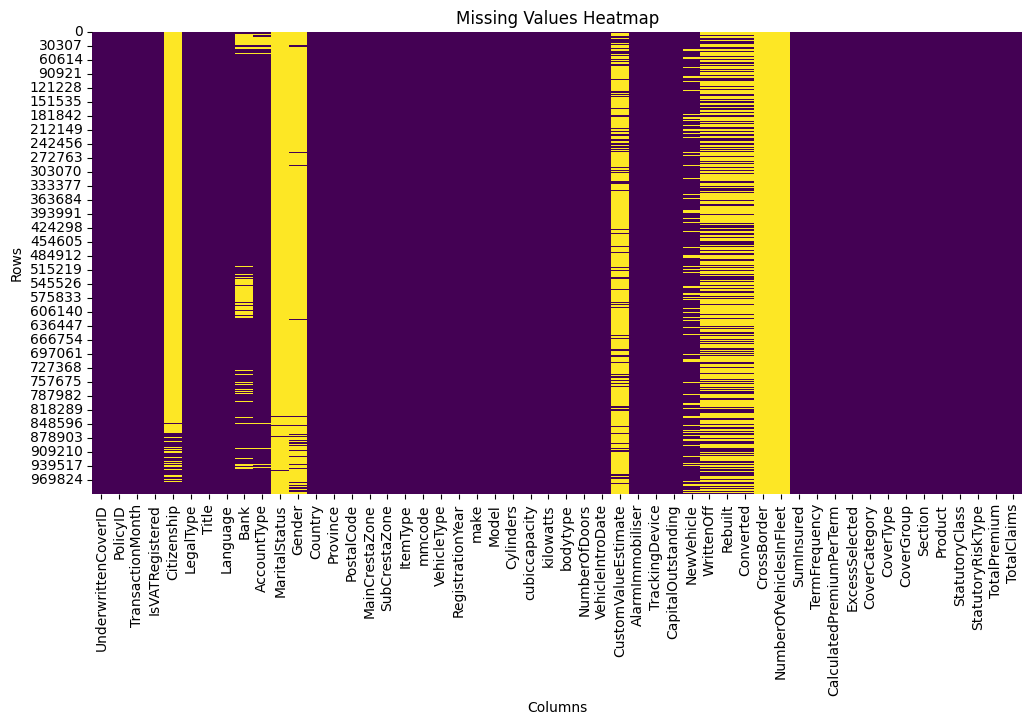

In [10]:
# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Fill catagorical missing value for Marage status and Gender using the title columns

In [11]:
# Function to fill missing values
def fill_missing_values(df):
    for index, row in df.iterrows():
        if pd.isnull(row['Gender']):
            if row['Title'] in ['Mr', 'Dr']:
                df.at[index, 'Gender'] = 'Male'
            elif row['Title'] in ['Miss', 'Ms']:
                df.at[index, 'Gender'] = 'Female'
        
        if pd.isnull(row['MaritalStatus']):
            if row['Title'] in ['Mr']:
                df.at[index, 'MaritalStatus'] = 'Single'
            elif row['Title'] in ['Mrs', 'Ms']:
                df.at[index, 'MaritalStatus'] = 'Married'

    return df

# Apply the function
data_filled = fill_missing_values(data)

## show the impact

          Column  Missing Values  Percentage Data Type
0  MaritalStatus            7424    0.742327    object
1         Gender           43490    4.348574    object


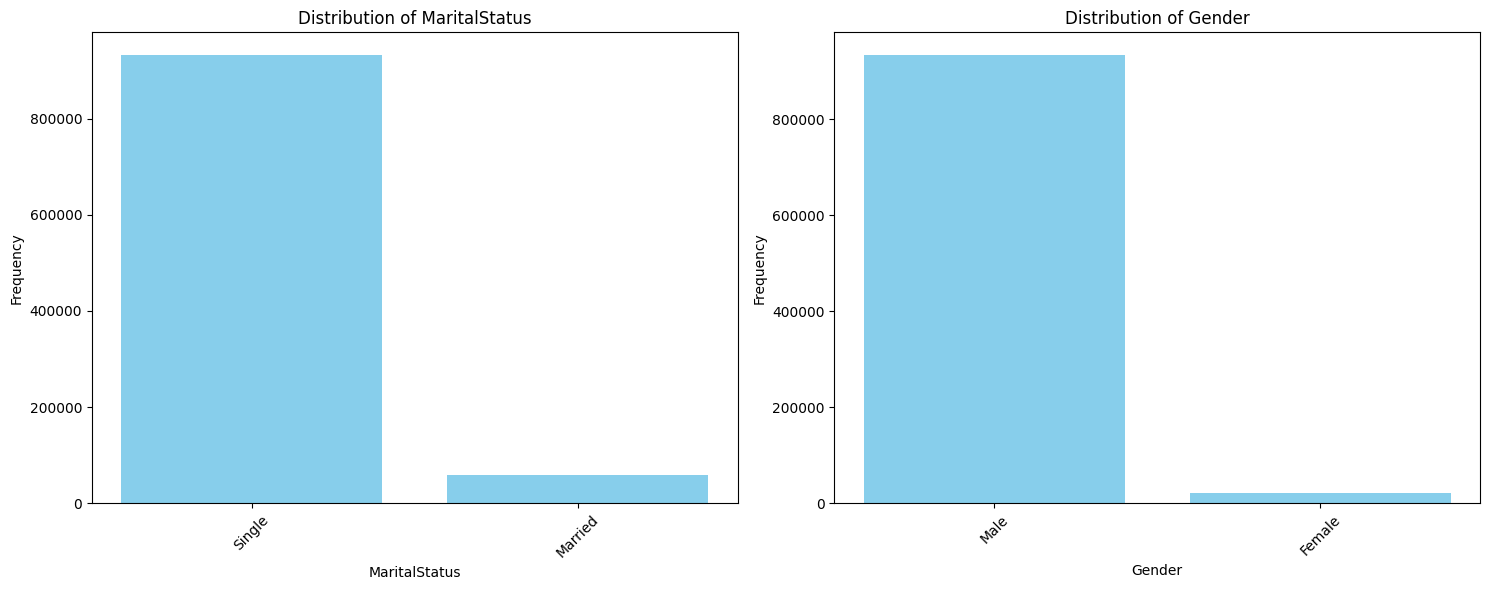

In [12]:
relevant_categorical_column = ["MaritalStatus", "Gender"]

# Check for missing values only in the relevant columns
missing_values = data[relevant_categorical_column].isnull().sum()

# Calculate percentage of missing values
missing_percentage = data[relevant_categorical_column].isnull().mean() * 100

# Get data types of each relevant column
data_types = data[relevant_categorical_column].dtypes

# Create a DataFrame to display the results
missing_data_table = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values,
    'Data Type': data_types.values
})

# Display the table
print(missing_data_table)

# Set up the number of subplots
num_columns = len(relevant_categorical_column)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 6))

# Loop through each relevant column and plot
for idx, column in enumerate(relevant_categorical_column):
    # Calculate the frequency counts
    value_counts = data[column].value_counts()
    
    # Create a bar chart in the corresponding subplot
    axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
    
    # Add titles and labels
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
    
    # Rotate x-axis labels if necessary
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Description of the Impact:
## Reduction in Missing Values:

### MaritalStatus:

Before Filling: 994,467 missing values, representing 99.44% of the data.
After Filling: 7,424 missing values, representing 0.74% of the data.
Impact: The percentage of missing values in the MaritalStatus column decreased significantly from 99.44% to 0.74%. This indicates that almost all of the missing values have been addressed, substantially improving the completeness of this column.

### Gender:

Before Filling: 950,526 missing values, representing 95.04% of the data.
After Filling: 43,490 missing values, representing 4.35% of the data.
Impact: The percentage of missing values in the Gender column decreased from 95.04% to 4.35%. While a significant number of missing values were filled, a notable portion of missing values remains. This still improves the dataset's usability but leaves some gaps.
Data Completeness:

Filling missing values improves the completeness of the dataset. With fewer missing values, analyses and model training become more reliable. In particular, having fewer missing values helps in generating more accurate statistics, trends, and insights.
Data Quality:

By filling missing values based on logical rules (e.g., Mr likely being Male and Single, Miss being Female, etc.), you enhance the consistency and quality of the data. This helps avoid potential biases or inaccuracies that could arise from having large amounts of missing data.
Analysis and Modeling:

Before Filling: The high percentage of missing values would have severely limited the ability to perform meaningful analysis or build reliable models. Many algorithms require complete data or handle missing values poorly.
After Filling: The reduced number of missing values improves the potential for statistical analysis and machine learning modeling, leading to more robust results.
Data Imputation Impact:

MaritalStatus and Gender Imputation: Filling in missing values with domain-specific rules ensures that the imputed values are sensible and reflect typical patterns based on the Title column. This approach, while reducing missing data, introduces assumptions based on Title which may not always perfectly match the true values for every individual.
Practical Considerations:

It’s important to verify the accuracy of the imputed values and consider the potential impact of any remaining missing values on downstream analyses. In practice, the imputed values should be validated or compared against known benchmarks or additional data if available.
By filling the missing values, you have significantly improved the completeness of your dataset, which should enhance the quality of any subsequent analyses or models.

### ______________________________________________________________________________________________________________

# Bivariate or Multivariate Analysis

## Scatter Plot for TotalPremium vs TotalClaims

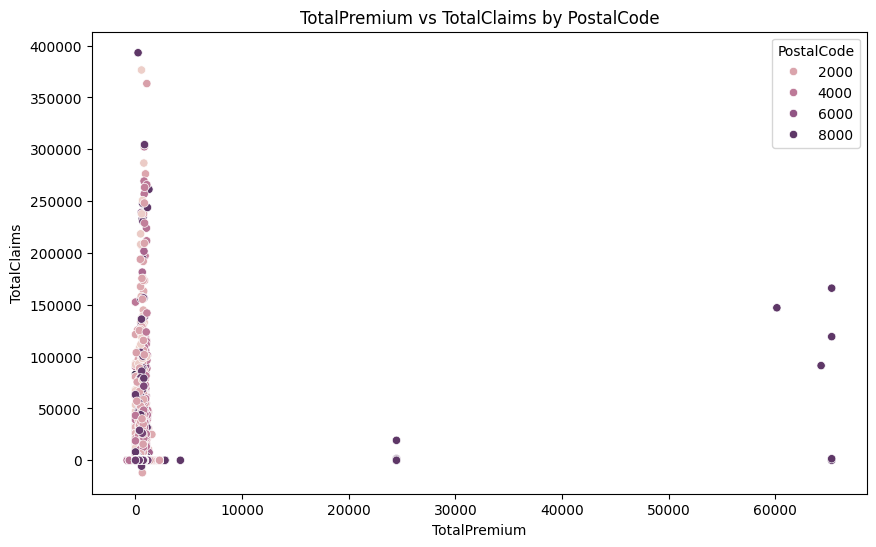

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='PostalCode')
plt.show()


## Correlation Matrix

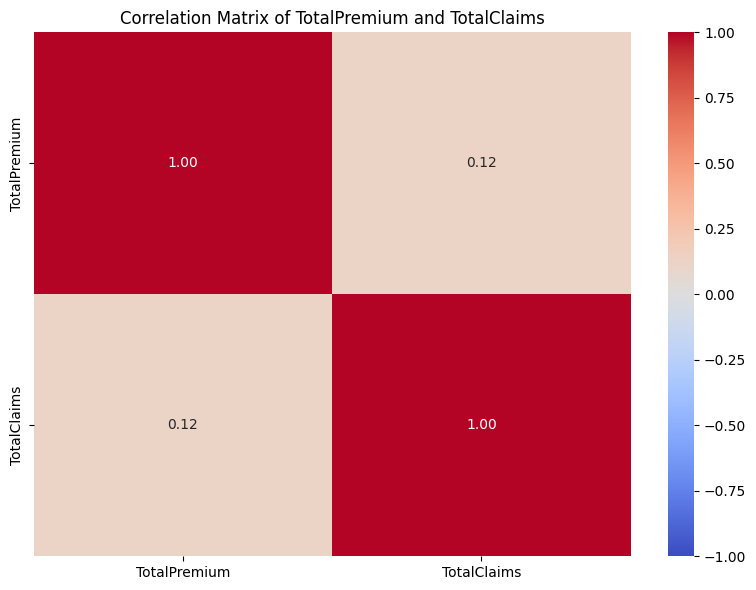

In [18]:
# Select numerical columns (TotalPremium, TotalClaims, etc.)
numeric_columns = ['TotalPremium', 'TotalClaims']
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.tight_layout()
plt.show()

# Data Aggregation by Geography

In [22]:
# Group by geographic feature (e.g., Province)
grouped_data = data.groupby(['Province']).agg({
    'CoverType': 'value_counts',   # Count occurrences of different cover types
    'TotalPremium': 'mean',        # Average premium per geographic area
    'make': 'value_counts'         # Count occurrences of car makes
}).reset_index()

print(grouped_data)

                                                 index  CoverType  \
0    (Eastern Cape, Cleaning and Removal of Acciden...     3006.0   
1                    (Eastern Cape, Emergency Charges)     3006.0   
2                      (Eastern Cape, Keys and Alarms)     3006.0   
3                           (Eastern Cape, Own Damage)     3006.0   
4                  (Eastern Cape, Passenger Liability)     3006.0   
..                                                 ...        ...   
344                               (Western Cape, FORD)        NaN   
345                          (Western Cape, MARCOPOLO)        NaN   
346                                (Western Cape, KIA)        NaN   
347                           (Western Cape, MAHINDRA)        NaN   
348                               (Western Cape, TATA)        NaN   

     TotalPremium  make  
0             NaN   NaN  
1             NaN   NaN  
2             NaN   NaN  
3             NaN   NaN  
4             NaN   NaN  
..            .

# Visualizing Trends

# Insurance Cover Type Comparison
You can use a bar chart or stacked bar chart to compare the distribution of different CoverType values by geography.

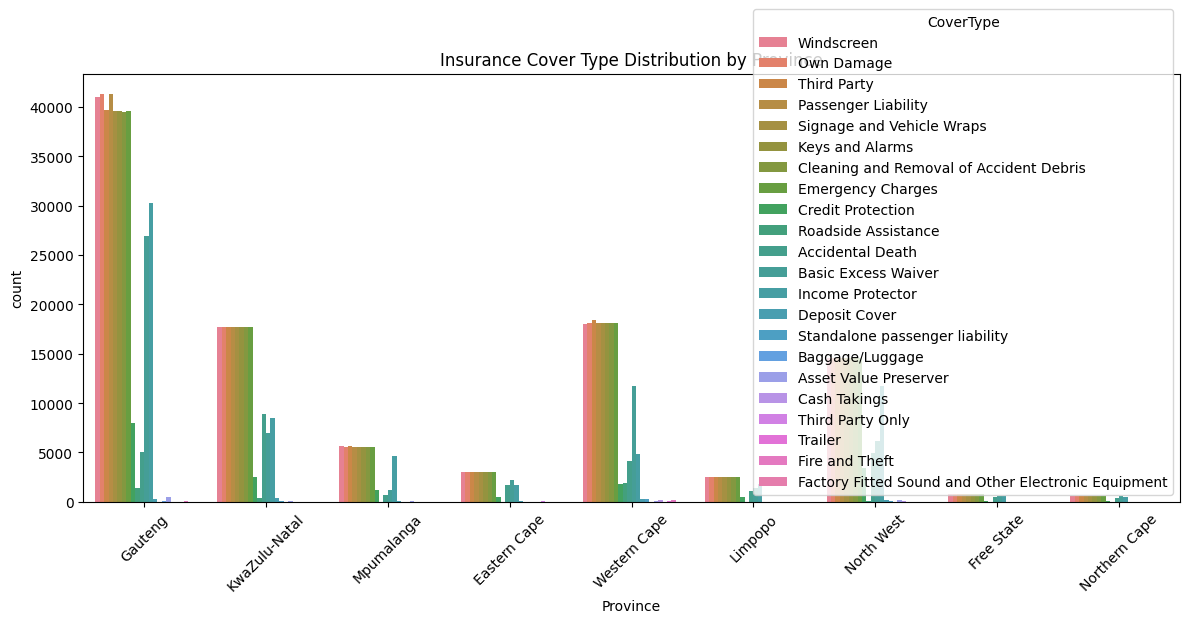

In [23]:
# Bar chart to compare cover types by province
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Province', hue='CoverType')
plt.title('Insurance Cover Type Distribution by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Premium Comparison by Geography
To compare the average premium (TotalPremium) across different geographic locations, a bar or box plot works well.

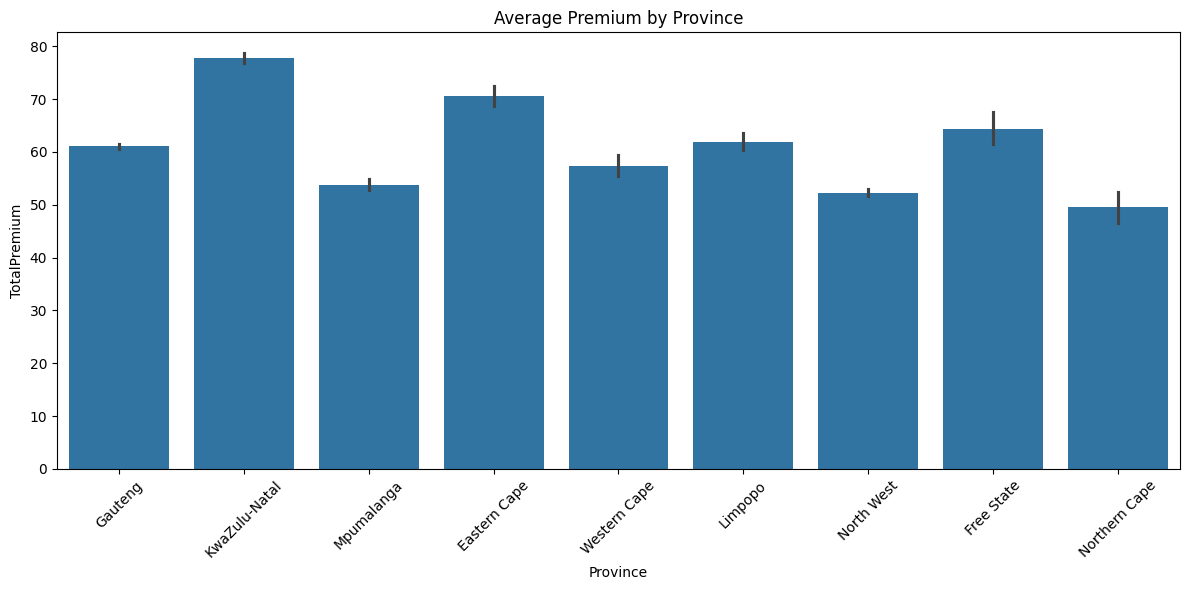

In [24]:
# Bar chart for average premiums by province
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Province', y='TotalPremium')
plt.title('Average Premium by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Car Make Trends by Geography

C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\4117793474.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


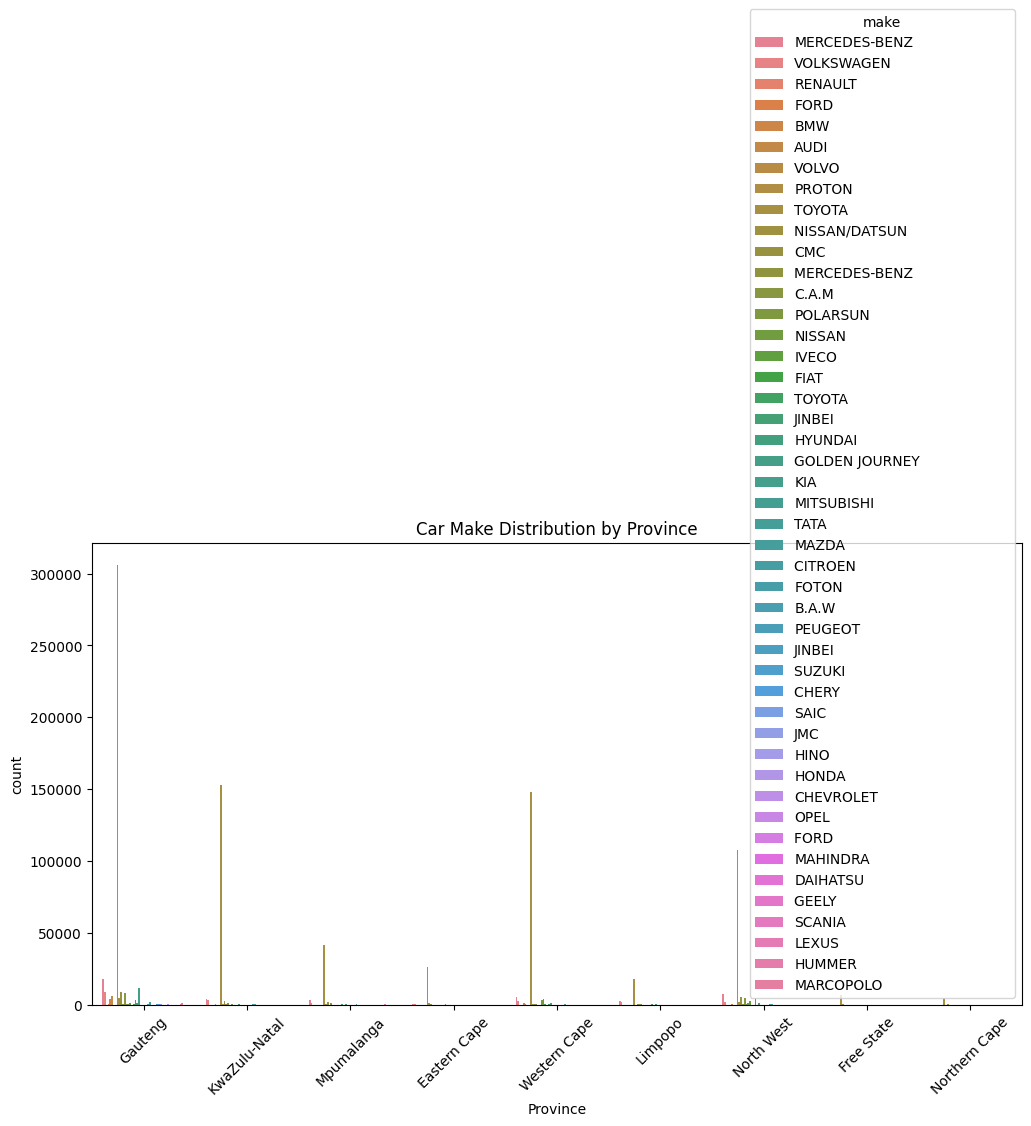

In [25]:
# Stacked bar chart for car makes by province
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Province', hue='make')
plt.title('Car Make Distribution by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier Detection Using Box Plots
You can use box plots to visually detect outliers in the numerical columns. Outliers typically appear as points beyond the whiskers in a box plot.

C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\2370828341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, palette="coolwarm")
C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\2370828341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, palette="coolwarm")
C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\2370828341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, palette="coolwarm")
C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\237

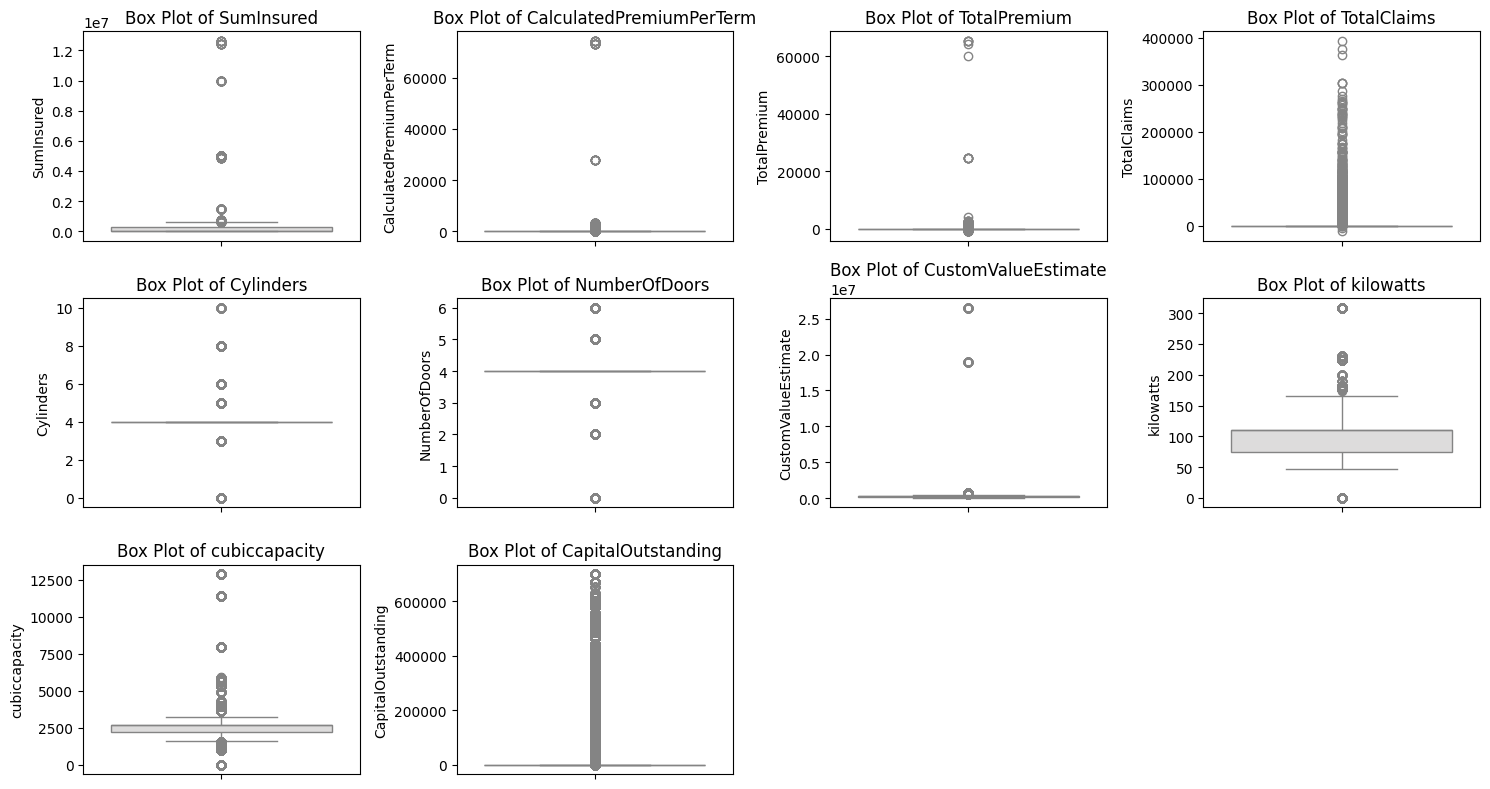

In [26]:
# Set up the figure and axes
plt.figure(figsize=(15, 8))

# Create box plots for each numerical column
for i, column in enumerate(relevant_numerical_columns):
    plt.subplot(3, 4, i+1)  # Create a grid of subplots
    sns.boxplot(data=data, y=column, palette="coolwarm")
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

# Bar Plot: Average Sum Insured by Car Make
This plot will show the average sum insured for different car makes, allowing you to analyze how different makes are insured at different levels.


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\1539813988.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='make', y='SumInsured', ci=None, palette='Set2')
C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_3008\1539813988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='make', y='SumInsured', ci=None, palette='Set2')


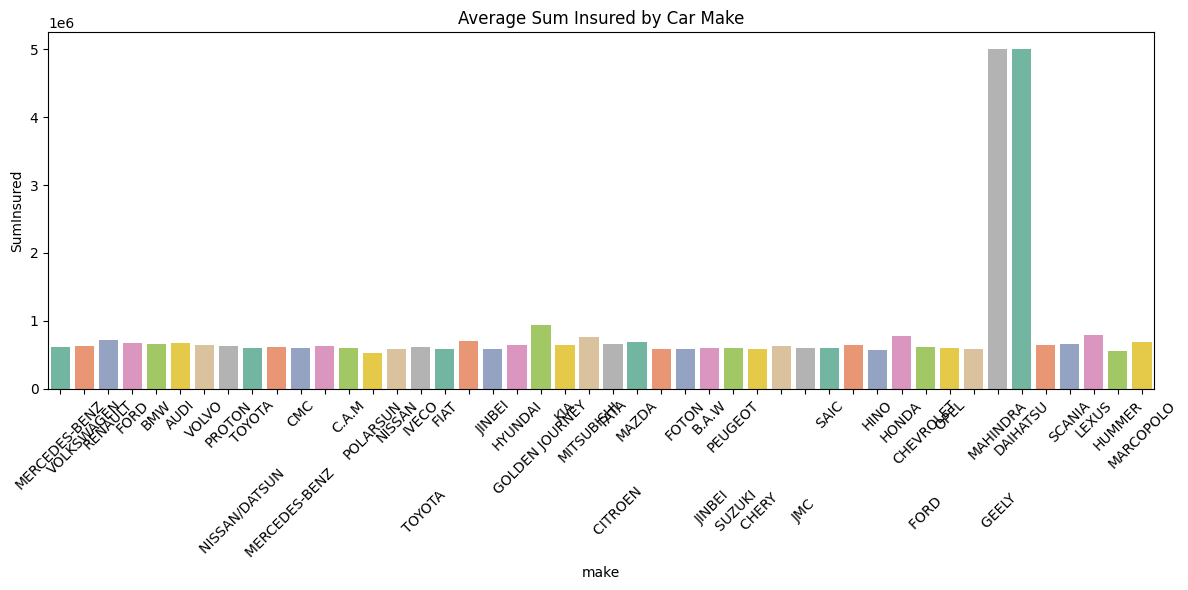

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='make', y='SumInsured', ci=None, palette='Set2')
plt.title('Average Sum Insured by Car Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Correlation Between Numerical Features
A heatmap of the correlation matrix can visually represent relationships between numerical columns and help identify highly correlated feature

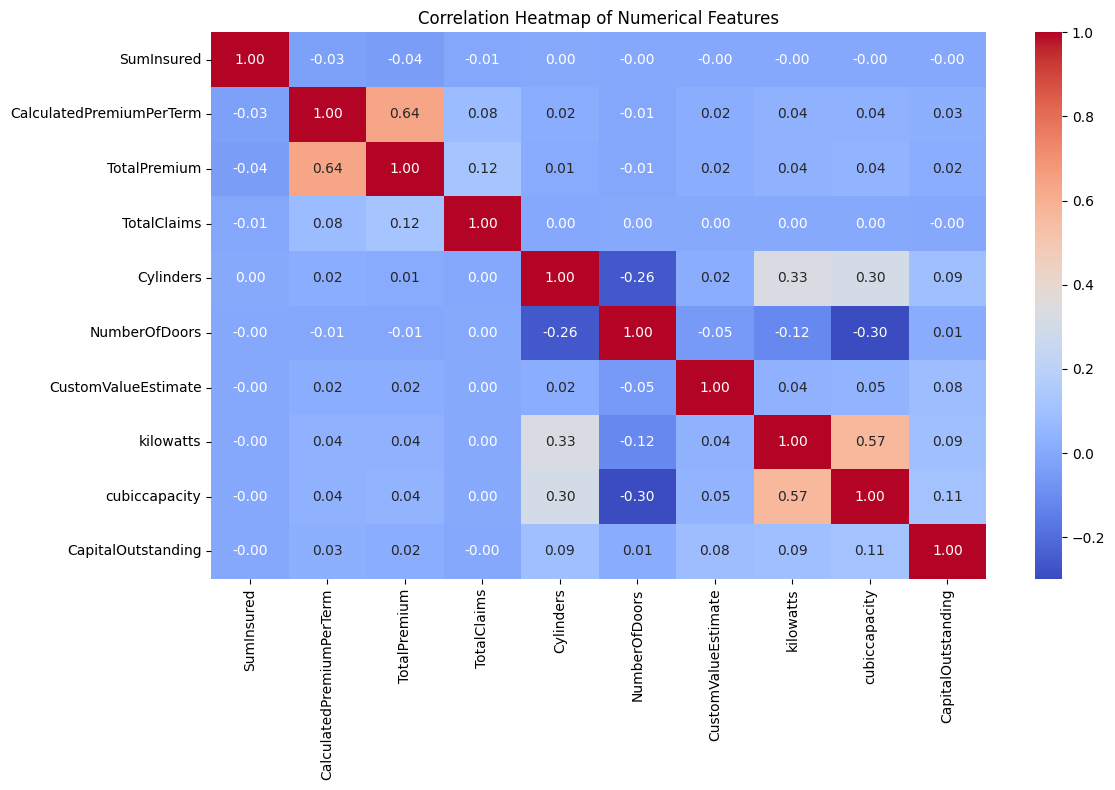

In [29]:
plt.figure(figsize=(12, 8))
corr = data[relevant_numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()